In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import skyproj
import numpy as np
import healpy as hp
import h5py

In [2]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
# plt.rc("text", usetex=True)
plt.rc("font", size=22)


COLORS = ["f07167","219ebc","c767ac","E0A100","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Load catalog and make mask

In [3]:
with h5py.File('/project/chihway/data/decade/metacal_gold_combined_mask_20240209.hdf', 'r') as f:
    
    mask = f['baseline_mcal_mask_noshear'][::] > 0
    
with h5py.File('/project/chihway/data/decade/metacal_gold_combined_20240209.hdf', 'r') as f:
    
    ra = f['RA'][::][mask]
    dec = f['DEC'][::][mask]
    

In [4]:
NSIDE = 128
pix = hp.ang2pix(NSIDE, ra, dec, lonlat = True)
Map = np.bincount(pix, minlength = hp.nside2npix(NSIDE)).astype(float)
# Map[Map < 1] = hp.UNSEEN

In [5]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap


original_cmap = plt.get_cmap('magma')

# original_cmap = LinearSegmentedColormap.from_list("custom_cmap", [COLORS[0], COLORS[1],  COLORS[2]])

colors = original_cmap(np.arange(original_cmap.N))
colors[0, -1] = 0  # The last number in the RGBA tuple is the alpha channel
custom_cmap = ListedColormap(colors)

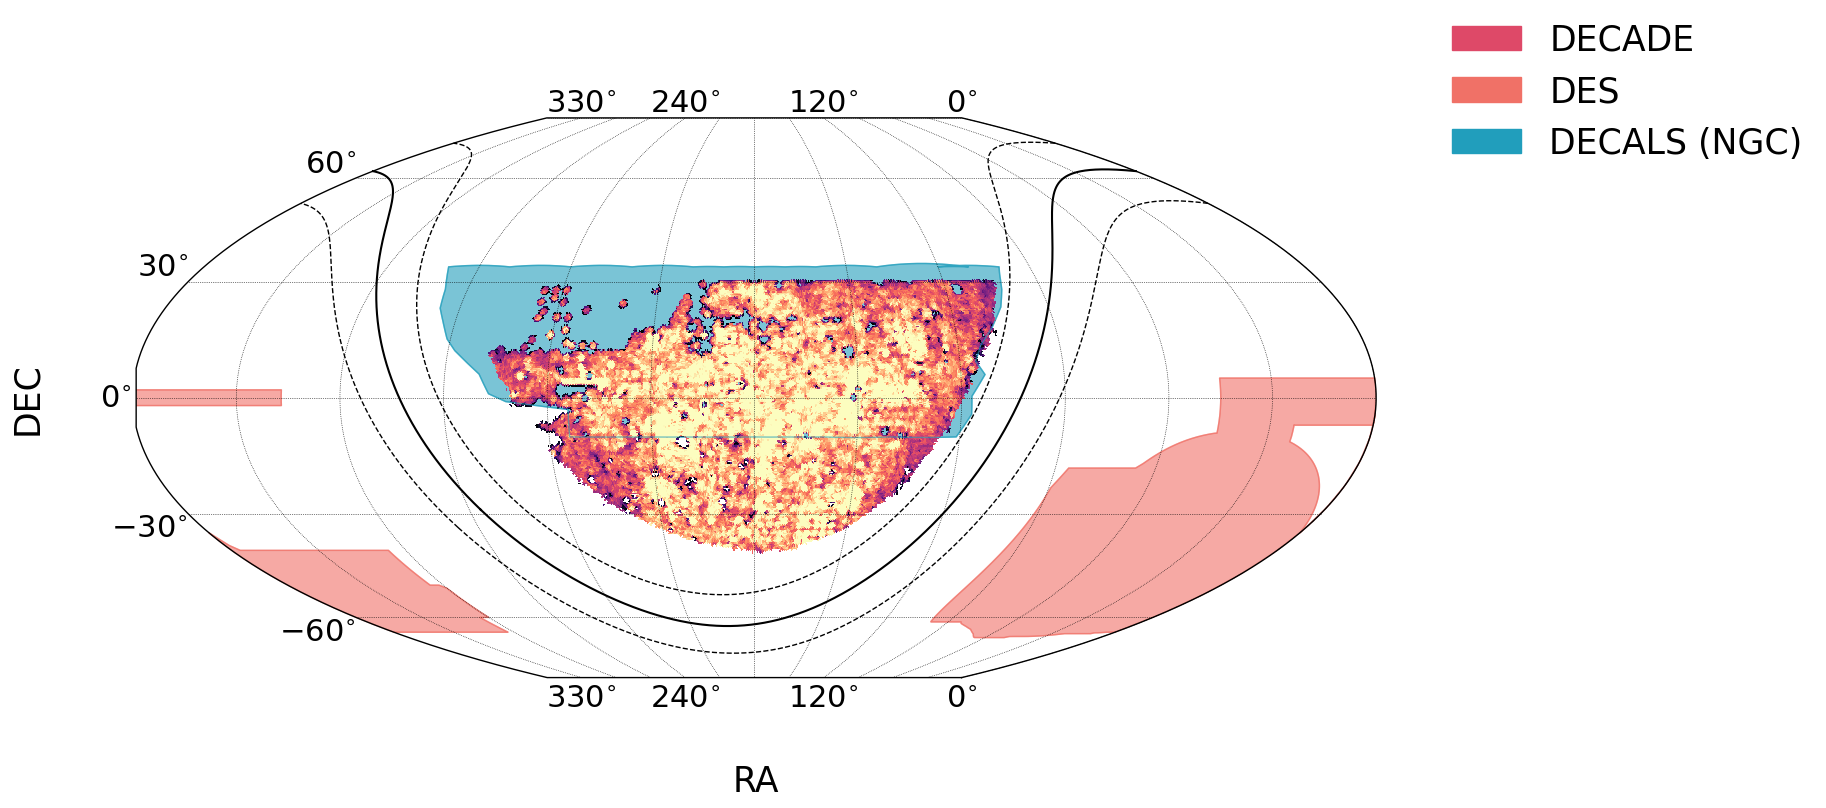

In [6]:
fig, ax = plt.subplots(figsize=(16, 16))
sp = skyproj.McBrydeSkyproj(ax = ax, lon_0 = 180)

sp.draw_milky_way()


filename = skyproj.utils.get_datafile('des-round19-poly.txt')
sp.draw_polygon_file(filename, edgecolor = 'C0', facecolor = 'C0', lw = 1, alpha = 0.6)

filename = skyproj.utils.get_datafile('decals-poly.txt')
polygon  = np.loadtxt(filename)
polygon  = polygon[polygon[:, -1] == 3]
sp.draw_polygon(polygon[:, 0], polygon[:, 1], edgecolor = 'C1', facecolor = 'C1', lw = 1, alpha = 0.6)

sp.draw_hpxmap(Map, cmap = custom_cmap, )

art = [mpl.patches.Patch(color = custom_cmap(0.6)),
       mpl.patches.Patch(color = 'C0'),
       mpl.patches.Patch(color = 'C1')
       ]
names = ['DECADE', 'DES', 'DECALS (NGC)']
plt.legend(art, names, fontsize = 25, frameon = False, loc = (1.05, 0.9))

sp.set_xlabel('RA', size = 25, pad = 40)
sp.set_ylabel('DEC', size = 25, pad = 40)


sp.set_extent([0, 360, -90, 90])

plt.savefig('./tmp.pdf', dpi = 300, bbox_inches = 'tight')

plt.show()

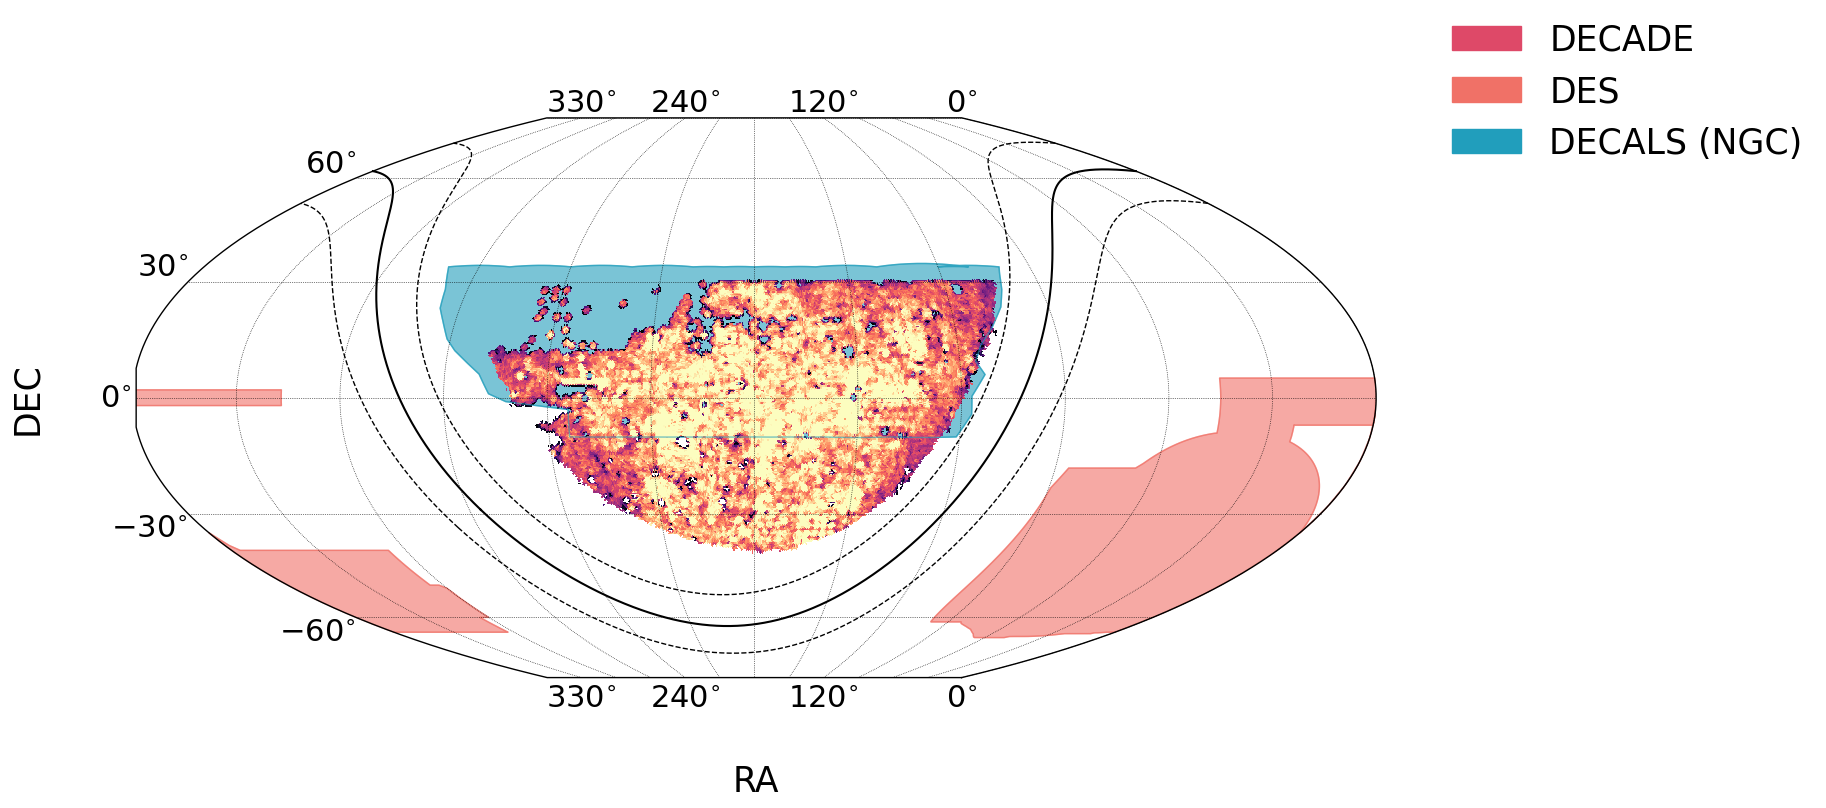

In [11]:
fig, ax = plt.subplots(figsize=(16, 16))
sp = skyproj.McBrydeSkyproj(ax = ax, lon_0 = 180)

sp.draw_milky_way()


filename = skyproj.utils.get_datafile('des-round19-poly.txt')
sp.draw_polygon_file(filename, edgecolor = 'C0', facecolor = 'C0', lw = 1, alpha = 0.6)

filename = skyproj.utils.get_datafile('decals-poly.txt')
polygon  = np.loadtxt(filename)
polygon  = polygon[polygon[:, -1] == 3]
sp.draw_polygon(polygon[:, 0], polygon[:, 1], edgecolor = 'C1', facecolor = 'C1', lw = 1, alpha = 0.6)

sp.draw_hpxmap(Map, cmap = custom_cmap, )

art = [mpl.patches.Patch(color = custom_cmap(0.6)),
       mpl.patches.Patch(color = 'C0'),
       mpl.patches.Patch(color = 'C1')
       ]
names = ['DECADE', 'DES', 'DECALS (NGC)']
plt.legend(art, names, fontsize = 25, frameon = False, loc = (1.05, 0.9))

sp.set_xlabel('RA', size = 25, pad = 40)
sp.set_ylabel('DEC', size = 25, pad = 40)


sp.set_extent([0, 360, -90, 90])

plt.savefig('./Footprint.pdf', dpi = 300, bbox_inches = 'tight')

plt.show()